In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all required dependencies
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime
import seaborn as sns
from pandas_datareader import data as pdr
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# getting the Date
today = datetime.now().date()
start_date = datetime(today.year-5 ,today.month ,today.day).date()

In [ ]:
#disconary of name of company and its ticker
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}

In [ ]:
for ticker in ticker_dist:
    filepath = "Resources/"+ ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    #globals()[ticker] = pdr.get_data_yahoo(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].index = globals()[ticker].index.date
    globals()[ticker].index.name='Date'
    globals()[ticker].index = pd.to_datetime(globals()[ticker].index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
company_list= [Google,Microsoft,Tesla,Amazon,Netflix,Apple,Facebook] # which is df name and data is stored
company_name=["Google","Microsoft","Tesla","Amazon","Netflix","Apple","Facebook"] # which name we want to give them  

In [ ]:
# Moving Average : a moving average (rolling average or running average) is a calculation to analyze data points by 
#creating a series of averages of different subsets of the full data set.
# here we are taking number of days for calculation of MA

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()        

In [ ]:
#Create one more column Prediction shifted 15 days up. 
for company in company_list:
        company['prediction'] = company['Adj Close'].shift(-15)

In [ ]:
Mearged_df = pd.concat(company_list, axis=0)

In [ ]:
Mearged_df

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,prediction
Date,,,,,,,,,,
2018-02-02,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,NaN,NaN,NaN,57.185001
2018-02-05,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,NaN,NaN,NaN,55.875500
2018-02-06,51.699001,54.368999,51.500500,54.221500,54.221500,76630000,NaN,NaN,NaN,55.195999
2018-02-07,54.248501,54.326500,52.730999,52.770500,52.770500,51942000,NaN,NaN,NaN,53.570499
2018-02-08,52.993500,53.196499,50.235001,50.385502,50.385502,66792000,NaN,NaN,NaN,54.207001
...,...,...,...,...,...,...,...,...,...,...
2023-01-26,144.399994,147.509995,143.300003,147.300003,147.300003,25482100,139.280,132.672001,122.476001,NaN
2023-01-27,148.240005,153.190002,147.389999,151.740005,151.740005,35746900,140.783,134.478001,123.226401,NaN
2023-01-30,149.410004,151.119995,146.949997,147.059998,147.059998,28040100,141.791,135.818001,123.826001,NaN


# Random Forest Regression

In [ ]:
Mearged_df.dropna(inplace=True)
y = Mearged_df[['prediction']]
X = Mearged_df.drop(['prediction'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
rf_model = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, max_features=4, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Get the root mean squared error (RMSE)
y_pred_rf=y_pred_rf.reshape(-1,1)
rmse = np.sqrt(np.mean(((y_pred_rf - y_test) ** 2)))
rmse

prediction    14.964684
dtype: float64

In [ ]:
rf_model.score(X_test,y_test)

0.9864279395991054

In [ ]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred_rf))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred_rf))

mean_squared_error :  223.94178201268173
mean_absolute_error :  9.220993761170572


In [ ]:
df_rfr = y_test.copy()
df_rfr['prediction using model'] = y_pred_rf

In [ ]:
df_rfr

,prediction,prediction using model
Date,,
2022-12-16,327.540009,301.721847
2018-05-29,95.841156,97.760865
2018-11-20,41.249191,39.860745
2018-07-18,347.609985,346.946697
2021-05-04,125.795403,130.882338
...,...,...
2018-08-30,361.190002,379.508998
2018-06-18,45.610653,46.673992
2019-09-25,57.229935,55.750916


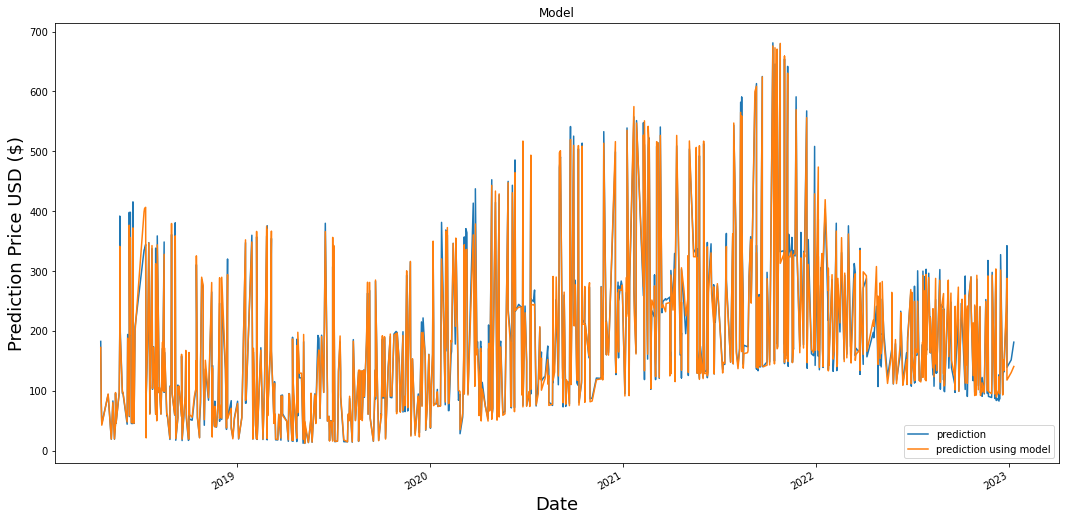

In [ ]:
plt.figure(figsize=(18,9))
df_rfr['prediction'].plot()
df_rfr['prediction using model'].plot()
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prediction Price USD ($)', fontsize=18)
plt.legend(['prediction', 'prediction using model'], loc='lower right')

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
# creating a regression model
lr_model = LinearRegression()

In [ ]:
# fitting the model
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# making predictions
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred_lr - y_test) ** 2)))
rmse

prediction    21.120255
dtype: float64

In [ ]:
lr_model.score(X_test,y_test)

0.9729660829248472

In [ ]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred_lr))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred_lr))

mean_squared_error :  446.0651799187165
mean_absolute_error :  12.843438669445463


In [ ]:
df_lr = y_test.copy()
df_lr['prediction using model'] = y_pred_lr

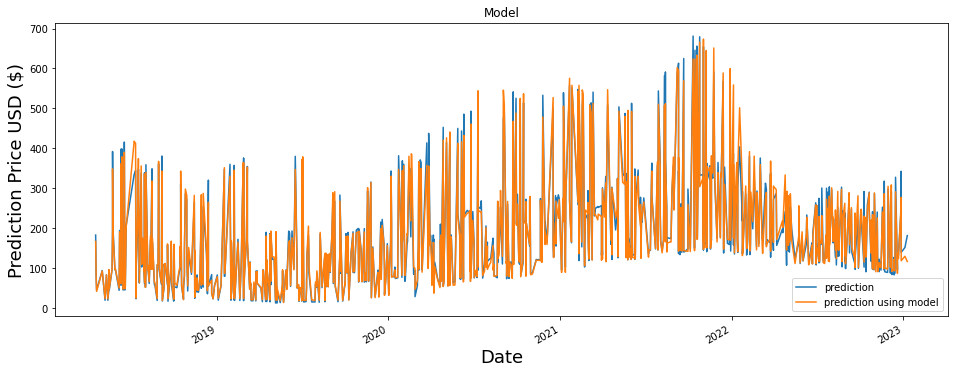

In [ ]:
plt.figure(figsize=(16,6))
df_lr['prediction'].plot()
df_lr['prediction using model'].plot()
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prediction Price USD ($)', fontsize=18)
plt.legend(['prediction', 'prediction using model'], loc='lower right')

In [ ]:
y = Mearged_df['prediction']
X = Mearged_df.drop(['prediction'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X.values)
X_scaled = pd.DataFrame(columns=X.columns,data = X_scaled,index = X.index)

In [ ]:
def lstm_split(data,n_steps):
  X_full = []
  y_full = []
  for i in range(len(data)-n_steps+1):
    X_full.append(data[i:i+n_steps,:-1])
    y_full.append(data[i+n_steps-1 , -1])
  return np.array(X_full), np.array(y_full)

In [ ]:
X1 , y1 = lstm_split(X_scaled.values, n_steps = 2)

train_split = 0.9
split_index = int(np.ceil(len(X1)*train_split))
date_index = X_scaled.index

X_train , X_test = X1[:split_index] , X1[split_index:]
y_train , y_test = y1[:split_index] , y1[split_index:]


In [ ]:
y1

array([-1.00087154, -1.00076742, -1.00072721, ..., -0.52815947,
       -0.52821554, -0.5226007 ])

In [ ]:
print(X1.shape , X_train.shape , X_test.shape , y_train.shape)

(8357, 2, 8) (7522, 2, 8) (835, 2, 8) (7522,)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

7522/7522 [==============================] - 29s 4ms/step - loss: 0.0298


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 128)            70144     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 121,203
Trainable params: 121,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)

27/27 [==============================] - 1s 3ms/step


In [ ]:
rmse = mean_squared_error(y_test,y_pred , squared = False)
rmse

0.12283419734643862